# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from lib import customPlots

In [2]:
# Macros

SEED = 2021
SAMPLE = 1000
DATA_PATH = 'data/df_train.csv'

In [3]:
df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head(5).T

(146082, 16)


0               1               2  \
Unnamed: 0                        192293          141719           16671   
id                            wqpe22hwjb      l144s4m9mu      y6extte83s   
date_account_created          2014-05-20      2014-01-14      2012-02-09   
timestamp_first_active    20140520182222  20140114180853  20120209001110   
gender                         -unknown-          FEMALE       -unknown-   
age                                  NaN            28.0             NaN   
signup_method                      basic           basic           basic   
signup_flow                            0               0               0   
language                              en              en              en   
affiliate_channel          sem-non-brand           other          direct   
affiliate_provider                google           other          direct   
first_affiliate_tracked              omg             omg             NaN   
signup_app                           Web             Web             Web   
first_device_type        Windows Desktop     Mac Desktop   Other/Unknown   
first_browser                         IE          Safari       -unknown-   
country_destination                  NDF              FR             NDF   

                                      3               4  
Unnamed: 0                        87691          116909  
id                           1u2r6m6ets      oleaq2ki3k  
date_account_created         2013-07-01      2013-10-15  
timestamp_first_active   20130701060451  20131015032212  
gender                             MALE       -unknown-  
age                                30.0            57.0  
signup_method                     basic           basic  
signup_flow                           0               0  
language                             en              en  
affiliate_channel                direct          direct  
affiliate_provider               direct          direct  
first_affiliate_tracked             omg       untracked  
signup_app                          Web             Web  
first_device_type           Mac Desktop            iPad  
first_browser                    Chrome   Mobile Safari  
country_destination                  US             NDF

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146082 entries, 0 to 146081
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               146082 non-null  int64  
 1   id                       146082 non-null  object 
 2   date_account_created     146082 non-null  object 
 3   timestamp_first_active   146082 non-null  int64  
 4   gender                   146082 non-null  object 
 5   age                      83469 non-null   float64
 6   signup_method            146082 non-null  object 
 7   signup_flow              146082 non-null  int64  
 8   language                 146082 non-null  object 
 9   affiliate_channel        146082 non-null  object 
 10  affiliate_provider       146082 non-null  object 
 11  first_affiliate_tracked  141676 non-null  object 
 12  signup_app               146082 non-null  object 
 13  first_device_type        146082 non-null  object 
 14  firs

In [5]:
df.describe()

Unnamed: 0  timestamp_first_active           age    signup_flow
count  146082.000000            1.460820e+05  83469.000000  146082.000000
mean   107146.457558            2.013091e+13     49.266314       3.366062
std     61446.482135            9.225704e+09    153.026081       7.750881
min         1.000000            2.009052e+13      1.000000       0.000000
25%     53950.250000            2.012123e+13     28.000000       0.000000
50%    107483.000000            2.013091e+13     34.000000       0.000000
75%    160309.750000            2.014031e+13     43.000000       0.000000
max    213450.000000            2.014063e+13   2014.000000      25.000000

In [6]:
df.isnull().sum()

Unnamed: 0                     0
id                             0
date_account_created           0
timestamp_first_active         0
gender                         0
age                        62613
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     4406
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

<AxesSubplot:>

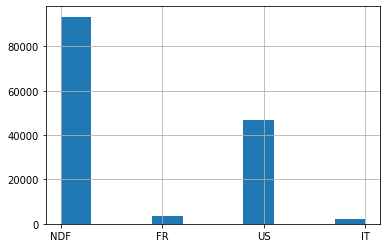

In [7]:
df['country_destination'].hist()

# Feature distribution per class

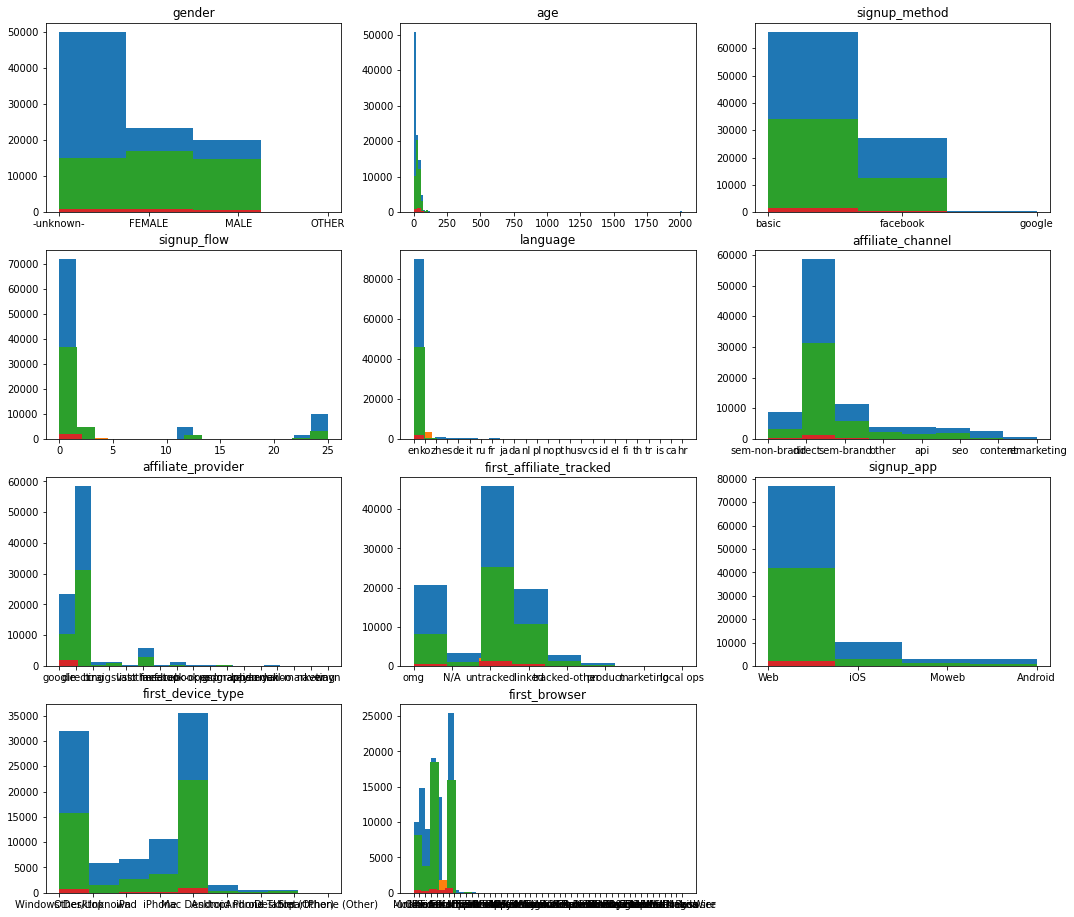

In [8]:
plt.figure(figsize=(18,16))
countries = df['country_destination'].unique()
columns = ['gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

df_copy = df[columns].copy()
df_copy['first_affiliate_tracked'] = df_copy['first_affiliate_tracked'].fillna('N/A')
df_copy['age'] = df_copy['age'].fillna(-1)

i = 1
for column in columns:
    plt.subplot(4, 3, i)
    plt.title(column)
    for country in countries:
        data = df_copy[df['country_destination'] == country][column]
        plt.hist(data, bins=len(data.unique()))
    i+=1

## Correlation between variables

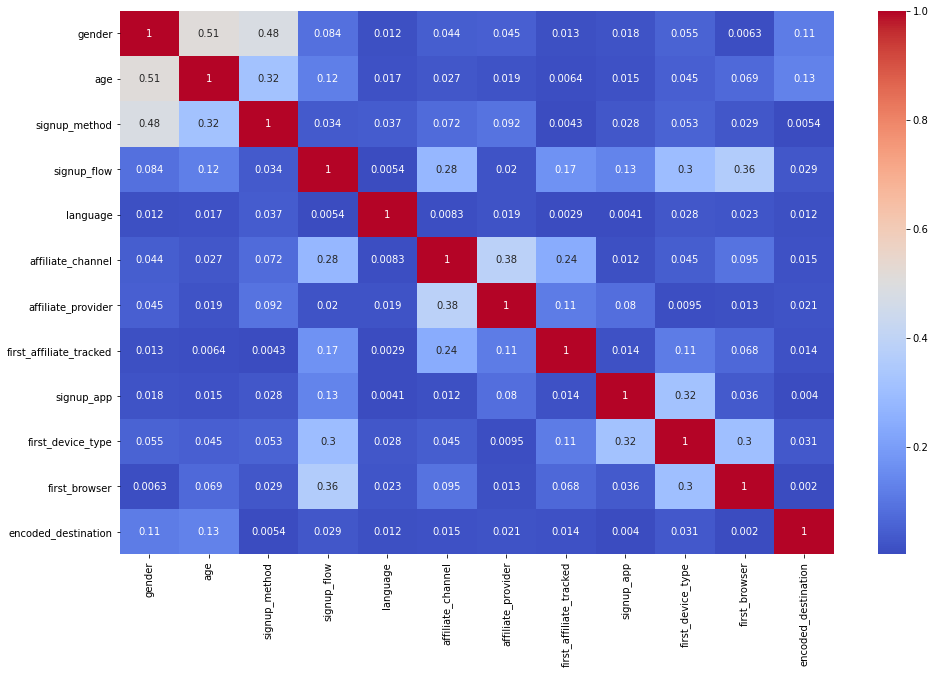

In [9]:
plt.figure(figsize=(16,10))
categorical_cols = df_copy.select_dtypes(exclude=np.number).columns.tolist()
for column in columns:
    df_copy[column] = df_copy[column].astype('category').cat.codes

df_copy['encoded_destination'] = df['country_destination'].astype('category').cat.codes
corr_matrix = df_copy.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

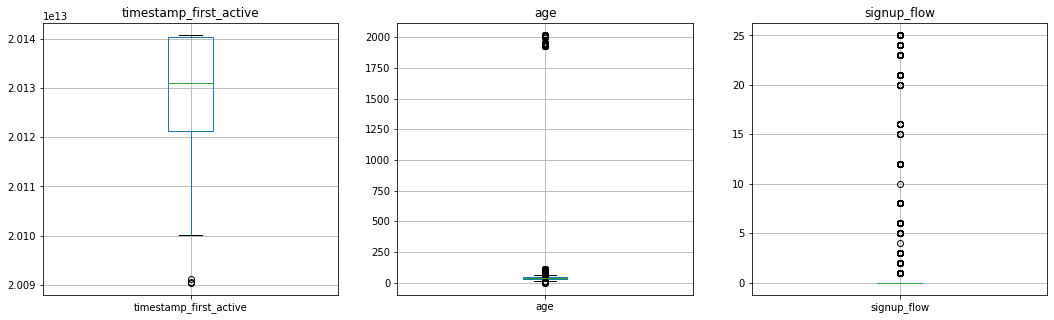

In [10]:
num_vars = df.select_dtypes(include=np.number).columns.tolist()
df_num = df[num_vars].drop('Unnamed: 0', axis=1)

plt.figure(figsize=(18, 5))
i = 1

for column in df_num.columns:
    plt.subplot(1, 3, i)
    plt.title(column)
    df_num[[column]].boxplot()
    i+=1

## Age

Age range: min 1.0 - max 2014.0
Percentage of NaNs: 42.86154351665503%
Percentage of values outside acceptable range: 0.3730781341986008%


<AxesSubplot:>

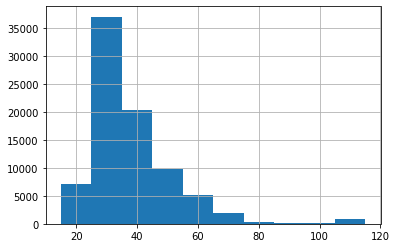

In [11]:
MIN_AGE = 7
MAX_AGE = 120

range_filter = (df['age'] >= MIN_AGE) & (df['age'] <= MAX_AGE)
nans = df['age'].isnull().sum()
outside_range = df.shape[0] - df[range_filter].shape[0] - nans

print(f"Age range: min {df['age'].min()} - max {df['age'].max()}")
print(f"Percentage of NaNs: {100*nans/df.shape[0]}%")
print(f"Percentage of values outside acceptable range: {100*outside_range/df.shape[0]}%")
df[range_filter]['age'].hist()

## Time analysis

In [12]:
df_time_data = df[['country_destination']].copy()
timestamp_first_active = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S').dt.date
date_account_created = pd.to_datetime(df['date_account_created']).dt.date
df_time_data['first_active_on_creation_date'] = timestamp_first_active == date_account_created

In [13]:
datetimes = pd.to_datetime(df['date_account_created'])
types = [
    {"name": "year", "period": "Y"},
    {"name": "month", "period": "-m"},
    {"name": "day", "period": "d"},
    {"name": "weekday", "period": "w"}
]

for date_type in types:
    df_time_data[f"register_{date_type['name']}"] = pd.to_numeric(datetimes.dt.strftime(f"%{date_type['period']}"))

df_time_data.head()

country_destination  first_active_on_creation_date  register_year  \
0                 NDF                           True           2014   
1                  FR                           True           2014   
2                 NDF                           True           2012   
3                  US                           True           2013   
4                 NDF                           True           2013   

   register_month  register_day  register_weekday  
0               5            20                 2  
1               1            14                 2  
2               2             9                 4  
3               7             1                 1  
4              10            15                 2

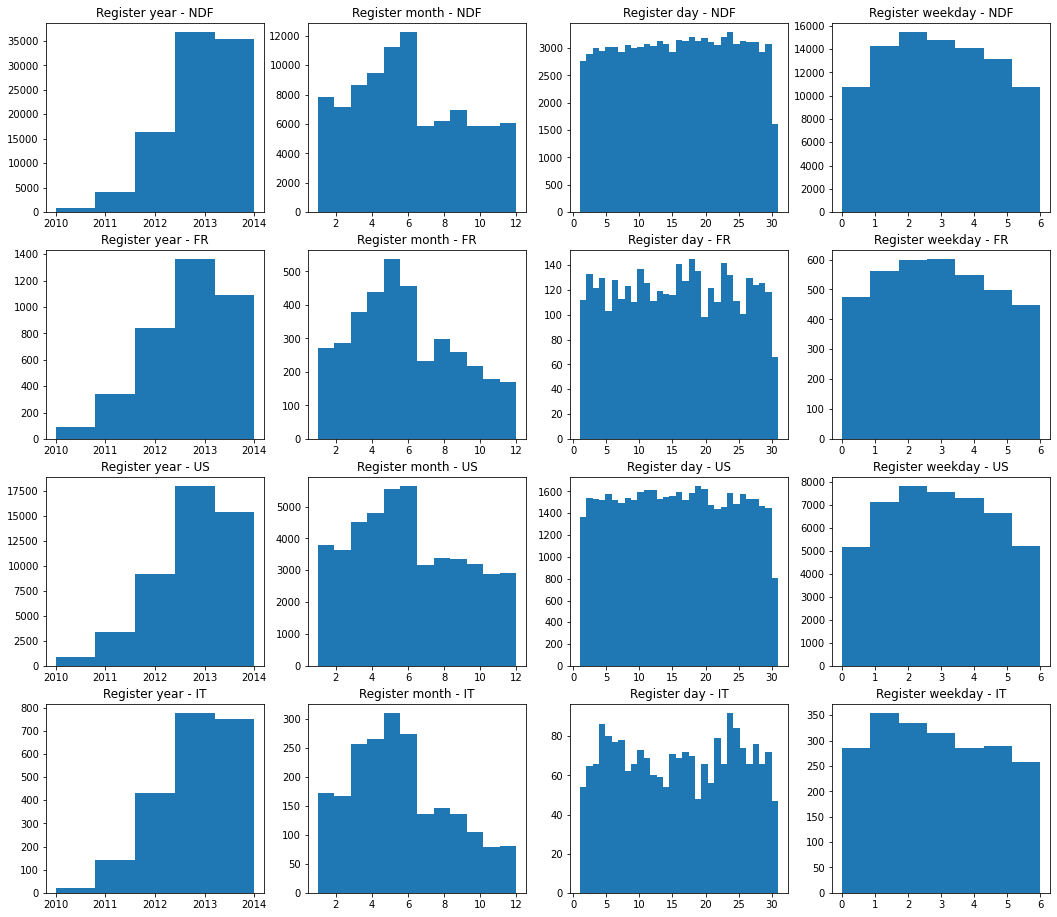

In [14]:
plt.figure(figsize=(18,16))

i = 1
for country in countries:
    for date_type in types:
        time_freq = df_time_data[df_time_data['country_destination'] == country][f"register_{date_type['name']}"]
        plt.subplot(4, 4, i)
        plt.hist(time_freq, bins=len(time_freq.unique()))
        plt.title(f"Register {date_type['name']} - {country}")
        i+=1

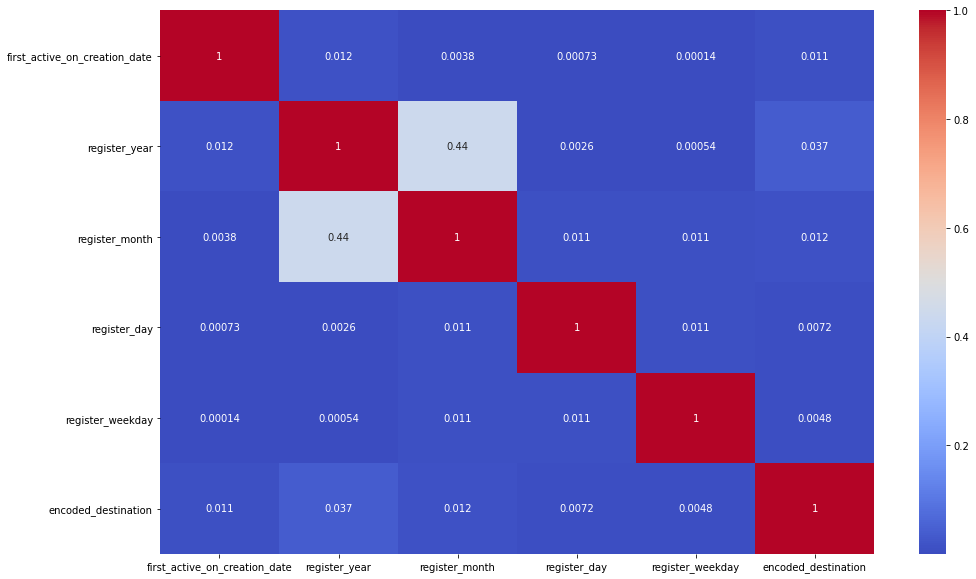

In [15]:
plt.figure(figsize=(16,10))
df_time_data['encoded_destination'] = df_time_data['country_destination'].astype('category').cat.codes
corr_matrix = df_time_data.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()